In [251]:
import torch
from torch import nn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn.functional as F



In [252]:

X, Y = make_circles(n_samples = 1000, noise = 0.2, random_state = 42)
X.shape, Y.shape

((1000, 2), (1000,))

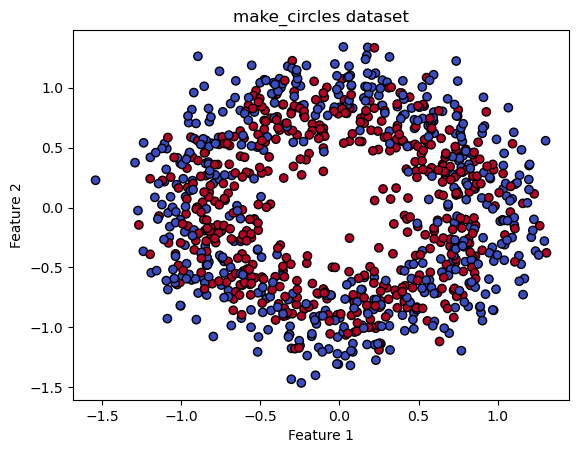

In [253]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolor='k')
plt.title("make_circles dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [254]:
data = pd.DataFrame({
    "X1":X[:, 0], "X2":X[:, 1], "label":Y
})
data.head()

,X1,X2,label
0,0.651912,0.360723,1
1,-0.568083,0.284437,1
2,-0.938360,0.587036,1
3,-0.694672,0.517336,1
4,0.471062,-0.881526,0


In [255]:
X, Y = torch.from_numpy(X).type(torch.float32), torch.from_numpy(Y).type(torch.float32)
X[:5], Y[:5]

(tensor([[ 0.6519,  0.3607],
         [-0.5681,  0.2844],
         [-0.9384,  0.5870],
         [-0.6947,  0.5173],
         [ 0.4711, -0.8815]]),
 tensor([1., 1., 1., 1., 0.]))

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [257]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features = 2, out_features = 64)
        self.layer2 = nn.Linear(in_features = 64, out_features = 32)
        self.layer3 = nn.Linear(in_features = 32, out_features = 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))  # or F.tanh / F.sigmoid etc.
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CircleModel()
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [258]:
device = "cpu"
model.to(device)

CircleModel(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [259]:
# model.state_dict()

In [260]:
lossFn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),  lr=0.01)
epochs = 1000
# model.requires_grad=True


for each_epoch in range(epochs):
    model.train()
    y_pred = model(X_train).squeeze()
    loss = lossFn(y_pred, y_train)  

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # train_acc = (torch.round(y_pred.view(-1)) == y_train).float().mean()
    # test_acc = (torch.round(y_test_pred.view(-1)) == y_test).float().mean()
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test).squeeze()
        loss = lossFn(y_pred_test, y_test)  
    if each_epoch % 10 == 0:
        print(f" Epoch: {each_epoch}, Train loss is {loss.item()} ans test loss is {test_loss.item()}")
    # print(f"Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")


 Epoch: 0, Train loss is 0.6927319169044495 ans test loss is 0.6814391613006592
 Epoch: 10, Train loss is 0.6926679015159607 ans test loss is 0.6814391613006592
 Epoch: 20, Train loss is 0.6926090121269226 ans test loss is 0.6814391613006592
 Epoch: 30, Train loss is 0.6925539970397949 ans test loss is 0.6814391613006592
 Epoch: 40, Train loss is 0.6925021409988403 ans test loss is 0.6814391613006592
 Epoch: 50, Train loss is 0.6924527883529663 ans test loss is 0.6814391613006592
 Epoch: 60, Train loss is 0.6924071311950684 ans test loss is 0.6814391613006592
 Epoch: 70, Train loss is 0.6923629641532898 ans test loss is 0.6814391613006592
 Epoch: 80, Train loss is 0.69232177734375 ans test loss is 0.6814391613006592
 Epoch: 90, Train loss is 0.6922854781150818 ans test loss is 0.6814391613006592
 Epoch: 100, Train loss is 0.6922540068626404 ans test loss is 0.6814391613006592
 Epoch: 110, Train loss is 0.6922182440757751 ans test loss is 0.6814391613006592
 Epoch: 120, Train loss is 0.

In [262]:
# Build model with non-linear activation function
from torch import nn
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc
    
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() 

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 0 | Loss: 0.69304, Accuracy: 52.38% | Test Loss: 0.69351, Test Accuracy: 49.50%
Epoch: 100 | Loss: 0.69146, Accuracy: 55.25% | Test Loss: 0.69249, Test Accuracy: 55.00%
Epoch: 200 | Loss: 0.69003, Accuracy: 55.75% | Test Loss: 0.69189, Test Accuracy: 53.50%
Epoch: 300 | Loss: 0.68823, Accuracy: 55.62% | Test Loss: 0.69126, Test Accuracy: 53.50%
Epoch: 400 | Loss: 0.68573, Accuracy: 57.50% | Test Loss: 0.69048, Test Accuracy: 53.00%
Epoch: 500 | Loss: 0.68229, Accuracy: 58.00% | Test Loss: 0.68936, Test Accuracy: 53.00%
Epoch: 600 | Loss: 0.67783, Accuracy: 59.13% | Test Loss: 0.68805, Test Accuracy: 52.50%
Epoch: 700 | Loss: 0.67209, Accuracy: 61.12% | Test Loss: 0.68673, Test Accuracy: 54.50%
Epoch: 800 | Loss: 0.66455, Accuracy: 61.62% | Test Loss: 0.68511,